# Fully Convolutional Network

https://arxiv.org/pdf/1411.4038.pdf

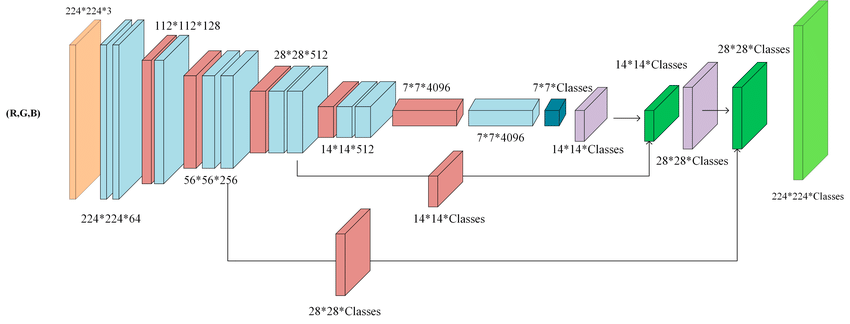

In [ ]:
# COn skip connections

model_vgg = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
model_vgg.trainable = False

decoder = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same')(model_vgg.layers[-1].output)
decoder = keras.layers.add([decoder, model_vgg.layers[-2].output])

decoder = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same')(decoder)
decoder = keras.layers.add([decoder, model_vgg.layers[-6].output])

decoder = Conv2DTranspose(64, (16,16), strides=(8,8), padding='same')(decoder)
decoder = keras.layers.add([decoder, model_vgg.layers[2].output])

decoder = Conv2D(1,(3,3), padding='same' )(decoder)

model = Model(model_vgg.input, decoder)
print(model.summary())

model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=['acc'])
#model.compile(loss='mse', optimizer='adam')

In [ ]:
# SIn skips connections
import numpy as np
import keras
import keras.applications
import keras.layers
from keras.models import Sequential, Model 
from keras import applications
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Conv2DTranspose, Conv2D, UpSampling2D


img_width, img_height = 224, 224

#
model_vgg = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))
model_vgg.trainable = False

decoder = Conv2DTranspose(512, (4,4), strides=(2,2), padding='same')(model_vgg.layers[-1].output)
decoder = keras.layers.add([decoder])

decoder = Conv2DTranspose(256, (4,4), strides=(2,2), padding='same')(decoder)
decoder = keras.layers.add([decoder])

decoder = Conv2DTranspose(183, (16,16), strides=(8,8), padding='same', activation='softmax')(decoder)
decoder = keras.layers.add([decoder])

#decoder = Conv2D(183,(3,3), padding='same' )(decoder)

model = Model(model_vgg.input, decoder)
print(model.summary())

model.compile(loss='mse', optimizer='adam', metrics=['acc'])
#model.compile(loss='mse', optimizer='adam')

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Get this repo
!git clone https://github.com/nightrome/cocostuff.git
!cd cocostuff

# Download everything
#!wget --directory-prefix=downloads http://images.cocodataset.org/zips/train2017.zip
!wget --directory-prefix=downloads http://images.cocodataset.org/zips/val2017.zip
!wget --directory-prefix=downloads http://calvin.inf.ed.ac.uk/wp-content/uploads/data/cocostuffdataset/stuffthingmaps_trainval2017.zip

# Unpack everything
!mkdir -p dataset/images
!mkdir -p dataset/annotations
#!unzip downloads/train2017.zip -d dataset/images/
!unzip downloads/val2017.zip -d dataset/images/
!unzip downloads/stuffthingmaps_trainval2017.zip -d dataset/annotations/


fatal: destination path 'cocostuff' already exists and is not an empty directory.
--2023-05-29 15:01:26--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.11.213, 52.217.141.233, 54.231.137.33, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.11.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘downloads/val2017.zip.2’

val2017.zip.2        24%[===>                ] 194.00M  96.6MB/s               ^C
--2023-05-29 15:01:28--  http://calvin.inf.ed.ac.uk/wp-content/uploads/data/cocostuffdataset/stuffthingmaps_trainval2017.zip
Resolving calvin.inf.ed.ac.uk (calvin.inf.ed.ac.uk)... 129.215.202.26
Connecting to calvin.inf.ed.ac.uk (calvin.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://calvin.inf.ed.ac.uk/wp-content/uploads/data/cocostuffdataset/stuffthingma

In [ ]:
# Cambia el tamaño de las imagenes al tamaño deseado
from PIL import Image
import os

new_width, new_height = img_width, img_height

os.makedirs("new_dataset/val2017/annotations", exist_ok=True)
os.makedirs("new_dataset/val2017/images/", exist_ok=True)

for im in os.listdir( "dataset/annotations/val2017" ):
  img = Image.open(f'dataset/annotations/val2017/{im}') 
  img = img.resize((new_width, new_height), Image.ANTIALIAS)
  img.save(f'new_dataset/val2017/annotations/{im}')

for im in os.listdir( "dataset/images/val2017" ):
  img = Image.open(f'dataset/images/val2017/{im}') 
  img = img.resize((new_width, new_height), Image.ANTIALIAS)
  img.save(f'new_dataset/val2017/images/{im}')

ModuleNotFoundError: ignored

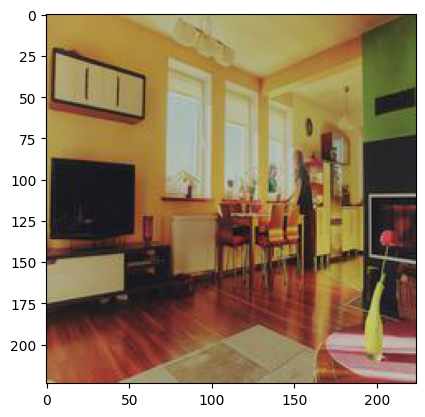

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

imgplot = plt.imshow(np.asarray(Image.open('new_dataset/val2017/images/000000000139.jpg')))

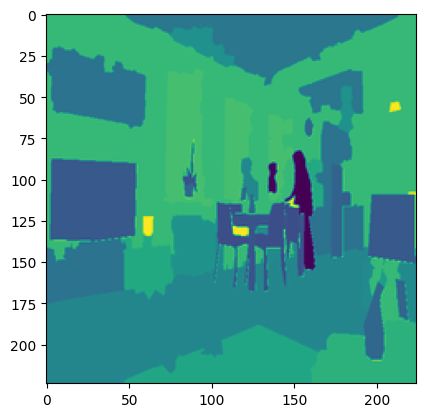

In [ ]:
imgplot2 = plt.imshow(np.asarray(Image.open('new_dataset/val2017/annotations/000000000139.png')))


In [ ]:
import numpy as np
imag = np.asarray(Image.open('new_dataset/val2017/images/000000000139.jpg'))
imag = imag.reshape(1,224,224,3)
p = model.predict(imag)

1/1 [==============================] - 0s 42ms/step


In [ ]:
p.shape

(1, 224, 224, 183)